# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [9]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [10]:
# (1) # Your Code goes here:
#Load the dataset raw_20news.csv
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')

(2) ***Your answer goes here:***
   The dataset contains the counts of the 520 words(eg. aaa,pins,kmr) of each news documents and the class of the news.

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [11]:
# (1) # Your Code goes here:
#get all the names of the attributes
columns_name_list = news_raw.columns.values.tolist() 
#displace the last 6 names of the attributes
print(columns_name_list [-6:])

['w516_combination', 'w517_sitting', 'w518_surface', 'w519_fashion', 'w520_sit', 'class']


(2) ***Your answer goes here:***
 'w516_combination', 'w517_sitting', 'w518_surface', 'w519_fashion',and 'w520_sit'
  means the count of words(combination,sitting,surface,fashion and sit) in the news documents.
 'class' means the class of the news.( 1 indicates alt.atheism. 2 indicates comp.sys.ibm.pc.hardware. 3 indicates comp.sys.mac.hardware.
4 indicates rec.sport.baseball. 5 indicates rec.sport.hockey )
 

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

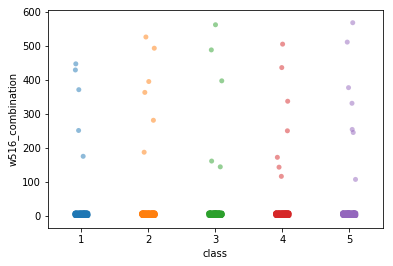

In [12]:
# (1) # Your Code goes here:
sns.stripplot(x=news_raw['class'],y=news_raw['w516_combination'],jitter=True,alpha= 0.5)


(2) ***Your answer goes here:***
'combination'appears only 1-10 times in most news documents. And in some documents, count of 'combination' could be larger(100-600).

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

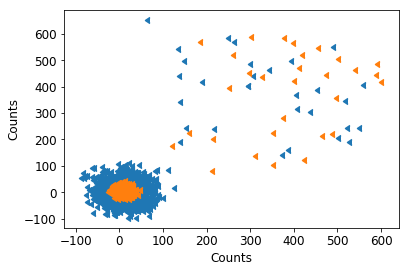

In [13]:
# (1) # Your Code goes here:
x = np.array(news_raw['w516_combination'])
y = np.array(news_raw['w519_fashion'])
scatter_jitter(x,y,jitter=0.7)

a = np.array(news_raw['w519_fashion'])
b = np.array(news_raw['w517_sitting'])
scatter_jitter(a,b,jitter=0.2)

plt.ylabel("Counts",fontsize=12)
plt.xlabel("Counts",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)

(2) ***Your answer goes here:***
No. Because these plots just help us to visualise the distribution of dataset. And it doesn't decide if there are outliers in the dataset.
I will use the stripplot which can help to know concentration of the data and whihc data are outliers in the data.

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of points in the cleaned dataset, and the number rejected as outliers and comment on the result

(1) ***Your answer goes here:***
 Compute the expectation μ and the standard deviation σ of the data, and the data value greater than μ+3σ or less than μ-3σ is excluded as an abnormal value.Because the probability of occurrence of data values larger than μ+3σ or smaller than μ-3σ in the experimental data values is small. 


In [14]:
#(2) Your Code goes here:
news_clean = news_raw.copy(deep=True)

mean = news_clean.mean()
std = news_clean.std()
up = mean + 3 * std
down = mean - 3 * std

print(news_raw.shape)

for i in news_clean.columns.values:
    news_clean = news_clean.loc[(news_raw[i] <= up[i]) & (news_raw[i] >= down[i])]

print(news_clean.shape)

(2129, 521)
(2094, 521)


(3) ***Your answer goes here:***
The number o fpoints in the cleaned dataset is 2129, and the number rejected as outliers is 2094.
"news_clean" has cleaned the 34 outliers in the dataset.


# ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [15]:
# (1) # Your Code goes here:
news_outlier = news_raw.copy(deep=True)

print(news_outlier.shape)
for j in news_outlier.columns.values[0:2]:
    news_outlier = news_outlier.loc[(news_outlier[j] > up[j])|(news_outlier[j] <down[j])]
#some of the inlier documents#
news_clean.tail()



(2129, 521)


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
2252,1,1,1,1,1,1,1,1,1,1,...,1,8,2,1,8,4,5,4,1,3
2253,1,1,1,1,1,1,1,1,1,1,...,1,2,5,3,7,4,5,2,7,2
2254,1,1,1,1,1,1,1,1,1,1,...,2,4,1,2,1,2,3,7,5,5
2255,1,1,1,1,1,1,1,1,1,2,...,7,3,8,8,2,2,7,8,7,4
2256,1,1,1,1,1,1,1,1,1,1,...,5,7,5,2,3,4,5,1,2,3


In [16]:
#some of the outlier documents#
news_outlier.tail()


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
2040,572,321,521,197,591,436,546,197,262,248,...,244,385,387,551,143,454,403,540,159,4
2081,440,329,190,245,202,398,493,167,318,489,...,589,204,107,111,562,279,175,371,109,3
2134,278,336,369,527,159,142,230,333,314,149,...,358,211,208,582,395,561,121,171,563,2
2185,480,531,151,121,188,560,332,350,252,316,...,137,316,237,489,175,209,124,198,101,1
2200,141,324,522,346,462,113,374,130,395,299,...,523,556,577,449,447,471,237,408,589,1


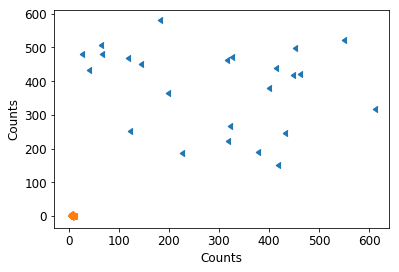

In [17]:
#visualise the inliner and outliner of the document#
x = np.array(news_outlier['w1_aaa'])
y = np.array(news_outlier['w2_pins'])
scatter_jitter(x,y,jitter=0.7)

a = np.array(news_clean['w1_aaa'])
b = np.array(news_clean['w2_pins'])
scatter_jitter(a,b,jitter=0.2)

plt.ylabel("Counts",fontsize=12)
plt.xlabel("Counts",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)

(2) ***Your answer goes here:***
Most words appear only 1-10 times in the news and the outlier appear over 100 times in the news.
It is inappropriate to cleaning the testing dataset.



## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [18]:
# Your Code goes here:
data_path_1 = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path_1, delimiter = ',')
data_path_2 = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path_2, delimiter = ',')
news_train.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


In [20]:
news_test.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***
1.The value of a particular feature is independent of the value of any other feature.
2.If the features are not independent,P（AB)≠P(A)P(B).So we can't use the Bayes Rule to
calculate the probability of P(B|A).

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset A. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

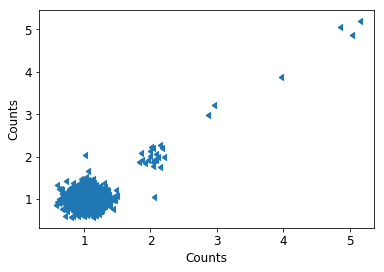

In [21]:
# (1) # Your Code goes here:
x = np.array(news_clean['w281_ico'])
y = np.array(news_clean['w273_tek'])
scatter_jitter(x,y,jitter=0.7)

plt.ylabel("Counts",fontsize=12)
plt.xlabel("Counts",fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)

(2) ***Your answer goes here:***
 The count of ico and the count of tek are nearly liner.
 No. Many words appear only oncen or twice in a file.But it doesn't mean that they can affect each other.

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***
 The classifer accuracy and confusion matrix could be used to evaluate the performance of classification.


In [22]:
# (2) # Your Code goes here:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
X = news_clean.drop('class',axis =1)
y = news_clean['class']
clf = DecisionTreeClassifier()
clf.fit(X,y)
tr_pred_dt = clf.predict(X=X)
ca_dt =accuracy_score(y,tr_pred_dt)
print(ca_dt)


1.0


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [23]:
# (1) # Your Code goes here:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
X = news_clean.drop('class',axis =1)
y = news_clean['class']
gnb = GaussianNB()
gnb.fit(X=X, y=y)


GaussianNB(priors=None)

0.8794664125774179
[[352   0  11   0   0]
 [  0 271 150   0   0]
 [  0   6 416   0   0]
 [  3   2  30 412   0]
 [  1   1  14  35 395]]


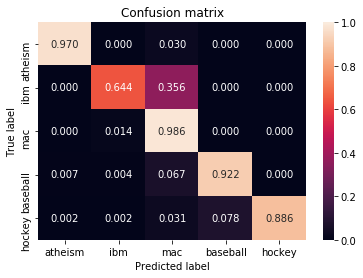

In [25]:
# (2) # Your Code goes here:
A = news_train.drop('class',axis=1)
b = news_train['class']
tr_pred = gnb.predict(X=A)
ca = accuracy_score(b, gnb.predict(A))
class_names =['atheism','ibm','mac','baseball','hockey']
print(ca)
cm = confusion_matrix(b, tr_pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix')
plt.show()

(3) ***Your answer goes here:***
The model does well in classification. Because it has a high accuracy . The accuracy could be a reasonable metric.

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***]
The confusion matrix shows that the model does well in prediction.
Yes.The value on the diagonal of the confusion matrix is high and the other value is low,which shows it has a good performance.


### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with the training data/baseline.

0.828125
[[19  0  0  1  0]
 [ 0 19 13  0  0]
 [ 0  2 20  0  0]
 [ 0  0  3 23  0]
 [ 0  0  1  2 25]]


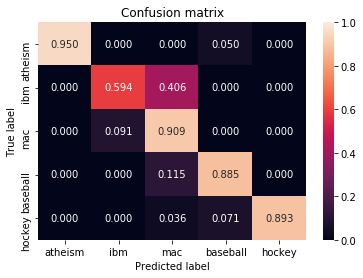

In [26]:
# (1) # Your Code goes here:
C = news_test.drop('class',axis=1)
d = news_test['class']
tr_pred = gnb.predict(X=C)
ca = accuracy_score(d, gnb.predict(C))
class_names =['atheism','ibm','mac','baseball','hockey']
print(ca)
cm = confusion_matrix(d, tr_pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix')
plt.show()


0.75
[[15  1  1  1  2]
 [ 0 25  6  1  0]
 [ 0  4 18  0  0]
 [ 3  5  0 17  1]
 [ 2  0  1  4 21]]


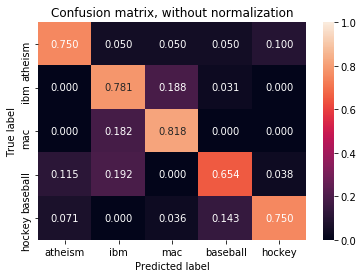

In [19]:
# (2) # Your Code goes here:

tr_pred_dt = clf.predict(X=C)
ca_dt =accuracy_score(d,tr_pred_dt)
print(ca_dt)
cm = confusion_matrix(d, tr_pred_dt)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, without normalization')
plt.show()


(3) ***Your answer goes here:***
The Guassian Naive Bayes model has a better performance than the decision tree model on the testing dataset according to the accuracy and the confusion matrix. The decsion tree model also can complete the news classfication, but the Guassian Naive Bayes has a higher accuracy and a better confusion matrix.The decision tree model are prone to overfitting.

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

0.171875
[[ 0  0 20  0  0]
 [ 0  0 32  0  0]
 [ 0  0 22  0  0]
 [ 0  0 26  0  0]
 [ 0  0 28  0  0]]


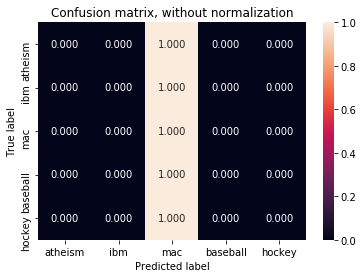

In [27]:
# (1) # Your Code goes here:
X_1 = news_raw.drop('class',axis =1)
y_1 = news_raw['class']
gnb = GaussianNB()
gnb.fit(X=X_1, y=y_1)
A_1 = news_test.drop('class',axis=1)
b_1 = news_test['class']
tr_pred_1 = gnb.predict(X=A_1)
ca = accuracy_score(b_1, gnb.predict(A_1))
print(ca)
cm = confusion_matrix(b_1, tr_pred_1)
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

(2) ***Your answer goes here:***
The Gaussian Naive Bayes model really has a bad perfmance on the raw dataset, because the accuray is low and the confusion matrix is terrible.
The Gasssian Naive Bayes model is sensitive to the outliers.

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***
 The Gussian Naive Bayes model is more suitable to deal with problem which differences among the distribution of class are obvious,such as the spam classfication.
 The Multinomial naive Bayes model will do better in text classfication when we use the frequency of the word in the text as feature.